# INTRODUCTION TO HSP2

Author: Jason Love,  RESPEC

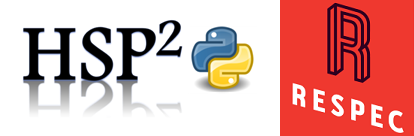

Copyright 2020 for this Jupyter Notebook and YouTube Video by RESPEC, INC.  All rights reserved.

$\textbf{HSP}^{\textbf{2}}\ \text{and}\ \textbf{HSP2}\ $ Copyright 2020 by RESPEC INC. and released under the *GNU AFFERO GENERAL PUBLIC LICENSE*

## Youtube Video Developed for HSP2 and this Tutorial

The following video is slightly dated by the version of Python and Notebook used in it.

Please consider using [Anaconda](https://www.anaconda.com/distribution/) to download Python 3.7 or above.
Instead of the older Jupyter Notebook, please run Jupyter Lab and use its Notebook. Jupyter Lab and the old Jupyter Notebook are distrubuted with the Anaconda download. In the future, the original Jupyter Notebook will be replaced by the Notebook in Jupyter Lab.

In [1]:
from IPython.display import IFrame
IFrame(src="https://www.youtube.com/embed/aeLScKsP1Wk?rel=0&amp;controls=0&amp;showinfo=0", width="896px", height="504px", frameborder="0", allowfullscreen=True)

## Required Python imports  and setup

In [2]:
from numpy.random import rand
from pandas import options, read_hdf, DataFrame, Series, date_range
from matplotlib import pyplot as plt

from HSP2tools import readWDM, readUCI, fetchtable, readCSV
from HSP2 import main, mainDoE, versions

# pandas display options
options.display.max_rows    = 20
options.display.max_columns = 14
options.display.float_format = '{:.2f}'.format  # display 2 digits after the decimal point

%matplotlib inline

versions(['matplotlib','jupyterlab'])          # display version information below

,version
Python,"3.8.3 | packaged by conda-forge | (default, Ju..."
HSP2,1.0.0
numpy,1.18.5
numba,0.49.1
pandas,1.0.4
matplotlib,3.2.1
jupyterlab,2.1.4
os,Windows-10-10.0.18362-SP0
processor,"Intel64 Family 6 Model 94 Stepping 3, GenuineI..."
Date/Time,2020-06-13 14:56:51


In [3]:
# make a new copy of the tutorial's data - trying things out doesn't hurt the orginal.
!xcopy TutorialData  Data /q /c /y

4 File(s) copied


## Run HSP2 on a legacy watershed

The demonstration uses the HSPF test10.

### Importing UCI and WDM File data into the HSP2 HDF5 File

In [4]:
# some convenient names of path to required files
uciname = 'Data/test10.uci'
wdmname = 'Data/test10.wdm'
hdfname = 'Data/test10.h5'

Insure test10.h5 doesn't exist in Data directory

In [5]:
!del Data\test10.h5

Now import UCI and WDM file data into the HSP2 HDF5 file

In [6]:
# creates HDF5 file (if it doesn't exist) and places UCI data into it
readUCI(uciname, hdfname)

# puts all timeseries discovered into HDF5 file with a summary table
readWDM(wdmname, hdfname)

,Start,Stop,Freq,Length,TSTYPE,TFILL,STAID,STNAM
TS039,1976-01-01 00:00:00,1977-01-01 00:00:00,1H,8784,PREC,-999.00,HOURLY PREC,PRECIP TRAER IOWA
TS041,1976-01-01 00:00:00,1977-01-01 00:00:00,1D,366,EVAP,-999.00,DAILY EVAP,FARMERS COOP WEATHER STN
TS042,1976-01-01 00:00:00,1977-01-01 00:00:00,1D,366,WIND,-999.00,DAILY WIND,FARMERS COOP WEATHER STN
TS046,1976-01-01 00:00:00,1977-01-01 00:00:00,2H,4392,SOLR,-999.00,2 HOUR RAD,FARMERS WEATHER STN
TS113,1976-01-01 00:00:00,1977-01-01 00:00:00,1D,366,FLOW,-999.00,DAILY FLOW,IOWA RIVER MARSHALLTOWN
TS119,1976-01-01 00:00:00,1977-01-01 00:00:00,1D,366,FLOW,-999.00,DAILY FLOW,IOWA RIVER MARENGO
TS121,1976-01-01 00:00:00,1977-01-01 00:00:00,2H,4392,ATMP,-999.00,2 HOUR AIR TEMP,CEDAR RAPIDS IOWA
TS122,1976-01-01 00:00:00,1977-01-01 00:00:00,2H,4392,ATMP,-999.00,2 HOUR AIR TEMP,IOWA FALLS IOWA
TS123,1976-01-01 00:00:00,1977-01-01 00:00:00,2H,4392,ATMP,-999.00,2 HOUR AIR TEMP,MARSHALLTOWN IOWA
TS124,1976-01-01 00:00:00,1977-01-01 00:00:00,1D,366,DEWP,-999.00,DAILY DEW PT,CEDAR RAPIDS IOWA


If you have installed any HDF5 viewer (like the free [HDFView]('https://www.hdfgroup.org/downloads/hdfview/')), you should examine the *test10.h5* file in the Data subdirectory.

**NOTE**

This Notebook previously discussed here the *ptrepack* utility to make the HDF5 file smaller.  In those days, if HSP2 was run multiple times on the same HDF5 file, the file grew considerably larger as new results and other data were updated.  The *ptrepack* utility would remove abandoned blocks inside the HDF5 file which reduced the file size. While not necessary after the HDF5 file was just created, this Notebook demonstrated this utility for users when necessary later.

In newer releases of the HDF5, within a session (opening and closing the file) internal space is reclaimed and reused. Abandoned blocks not reused during the session will not reclaimed automatically afterward. 

Normally with HSP2, the file may only grow by a few bytes with each run since tables and results being updated generally have about the same size before and after.  

While *ptrepack* can still compress a large file by removing abandoned blocks and optionally apply one of many standard compression algorithms, this should not be an issue for most HSP2 users. The *ptrepack*tool and HDF5 compression are discussed in the Pandas documentation of the HDF5 I/O tool.

### How to run HSP2

The *saveall* argument is optional and only used to force saving all computed timeseries into the HDF5. If not specified, *SAVE* tables for each activity (like SNOW, PWATER) allow the user to control which timeseries are saved for the run.  The default *SAVE* tables save the minimum timeseries required by other activites and for the linkage between PERLND, IMPLND, and RCHRES segments.

The first time HSP2 is run on your machine, the Numba code will compile the activity code and cache the complied code for future runs.  Python will also "compile" all code and cache its results (\*.py -> \*.pyc) Numba will automatically recompile whenever you update HSP2.

In [7]:
main(hdfname)

2020-06-13 14:57:01.25   Processing started for file Data/test10.h5; saveall=False
2020-06-13 14:57:04.00   Simulation Start: 1976-01-01 00:00:00, Stop: 1977-01-01 00:00:00
2020-06-13 14:57:04.00      PERLND P001 DELT(minutes): 60
2020-06-13 14:57:06.28         SNOW
2020-06-13 14:57:07.72         PWATER
2020-06-13 14:57:07.79      RCHRES R001 DELT(minutes): 60
2020-06-13 14:57:07.87         HYDR
2020-06-13 14:57:08.17      RCHRES R002 DELT(minutes): 60
2020-06-13 14:57:08.24         HYDR
2020-06-13 14:57:08.31      RCHRES R003 DELT(minutes): 60
2020-06-13 14:57:08.38         HYDR
2020-06-13 14:57:08.42      RCHRES R004 DELT(minutes): 60
2020-06-13 14:57:08.49         HYDR
2020-06-13 14:57:08.54      IMPLND I001 DELT(minutes): 60
2020-06-13 14:57:08.61         SNOW
2020-06-13 14:57:08.65         IWATER
2020-06-13 14:57:08.68      RCHRES R005 DELT(minutes): 60
2020-06-13 14:57:08.75         HYDR
2020-06-13 14:57:08.80   Done; Run time is about 00:07.5 (mm:ss)


                          

**Save test10.h5 for future use.**

In [8]:
!copy Data\test10.h5 TutorialData

        1 file(s) copied.


**Rerun the following cell to see the improvement caused by caching the compiled code.**

In [9]:
main(hdfname)

2020-06-13 14:57:09.05   Processing started for file Data/test10.h5; saveall=False
2020-06-13 14:57:11.79   Simulation Start: 1976-01-01 00:00:00, Stop: 1977-01-01 00:00:00
2020-06-13 14:57:11.79      PERLND P001 DELT(minutes): 60
2020-06-13 14:57:11.87         SNOW
2020-06-13 14:57:11.91         PWATER
2020-06-13 14:57:11.95      RCHRES R001 DELT(minutes): 60
2020-06-13 14:57:12.03         HYDR
2020-06-13 14:57:12.09      RCHRES R002 DELT(minutes): 60
2020-06-13 14:57:12.16         HYDR
2020-06-13 14:57:12.20      RCHRES R003 DELT(minutes): 60
2020-06-13 14:57:12.27         HYDR
2020-06-13 14:57:12.31      RCHRES R004 DELT(minutes): 60
2020-06-13 14:57:12.38         HYDR
2020-06-13 14:57:12.43      IMPLND I001 DELT(minutes): 60
2020-06-13 14:57:12.50         SNOW
2020-06-13 14:57:12.54         IWATER
2020-06-13 14:57:12.56      RCHRES R005 DELT(minutes): 60
2020-06-13 14:57:12.63         HYDR
2020-06-13 14:57:12.68   Done; Run time is about 00:03.6 (mm:ss)


                          

**The run time for the run above will be used to compare the the time to Design of Experiment run later on.**

**Now see the difference in run time when all computed timeseries are saved.  This data will be used in the next section.**

In [10]:
main(hdfname, saveall=True)

2020-06-13 14:57:12.73   Processing started for file Data/test10.h5; saveall=True
2020-06-13 14:57:15.52   Simulation Start: 1976-01-01 00:00:00, Stop: 1977-01-01 00:00:00
2020-06-13 14:57:15.52      PERLND P001 DELT(minutes): 60
2020-06-13 14:57:15.59         SNOW
2020-06-13 14:57:15.64         PWATER
2020-06-13 14:57:15.70      RCHRES R001 DELT(minutes): 60
2020-06-13 14:57:15.78         HYDR
2020-06-13 14:57:15.85      RCHRES R002 DELT(minutes): 60
2020-06-13 14:57:15.92         HYDR
2020-06-13 14:57:15.97      RCHRES R003 DELT(minutes): 60
2020-06-13 14:57:16.04         HYDR
2020-06-13 14:57:16.08      RCHRES R004 DELT(minutes): 60
2020-06-13 14:57:16.15         HYDR
2020-06-13 14:57:16.21      IMPLND I001 DELT(minutes): 60
2020-06-13 14:57:16.28         SNOW
2020-06-13 14:57:16.33         IWATER
2020-06-13 14:57:16.35      RCHRES R005 DELT(minutes): 60
2020-06-13 14:57:16.42         HYDR
2020-06-13 14:57:16.48   Done; Run time is about 00:03.7 (mm:ss)


                           

### Review simulated hydraulic state variables and fluxes from hdf5 file for Reach 1

In [11]:
tsMaster = read_hdf(hdfname, '/RESULTS/RCHRES_R001/HYDR')
tsMaster

,DEP,IVOL,O1,O2,OVOL1,OVOL2,PRSUPY,RO,ROVOL,SAREA,TAU,USTAR,VOL,VOLEV
1976-01-01 00:00:00,9.95,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.03,0.00,0.00,30.02,0.00
1976-01-01 01:00:00,9.96,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.03,0.00,0.00,30.04,0.00
1976-01-01 02:00:00,9.96,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.04,0.00,0.00,30.06,0.00
1976-01-01 03:00:00,9.96,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.04,0.00,0.00,30.09,0.00
1976-01-01 04:00:00,9.97,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.04,0.00,0.00,30.11,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1976-12-31 19:00:00,9.55,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.79,0.00,0.00,27.63,0.00
1976-12-31 20:00:00,9.55,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.79,0.00,0.00,27.64,0.00
1976-12-31 21:00:00,9.55,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.79,0.00,0.00,27.64,0.00
1976-12-31 22:00:00,9.55,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.79,0.00,0.00,27.64,0.00


Compute some basic statistics for this data

In [12]:
tsMaster.describe()

,DEP,IVOL,O1,O2,OVOL1,OVOL2,PRSUPY,RO,ROVOL,SAREA,TAU,USTAR,VOL,VOLEV
count,8784.00,8784.00,8784.00,8784.00,8784.00,8784.00,8784.00,8784.00,8784.00,8784.00,8784.00,8784.00,8784.00,8784.00
mean,12.75,0.27,2.94,0.31,0.24,0.03,0.00,3.25,0.27,7.73,0.00,0.00,54.33,0.00
std,4.08,0.37,3.56,1.29,0.29,0.11,0.02,4.26,0.35,2.48,0.00,0.00,35.71,0.00
min,9.32,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.65,0.00,0.00,26.33,0.00
25%,9.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.72,0.00,0.00,27.03,0.00
50%,10.30,0.06,0.69,0.00,0.06,0.00,0.00,0.69,0.06,6.24,0.00,0.00,32.15,0.00
75%,17.29,0.49,6.56,0.00,0.54,0.00,0.00,6.56,0.54,10.48,0.00,0.00,90.59,0.00
max,20.22,2.68,10.14,10.83,0.84,0.89,0.64,20.97,1.73,12.25,0.00,0.00,123.90,0.01


### Examine RCHRES R001 Output Flow, **RO**

In [13]:
tsMaster['RO'].describe()

count   8784.00
mean       3.25
std        4.26
min        0.00
25%        0.00
50%        0.69
75%        6.56
max       20.97
Name: RO, dtype: float64

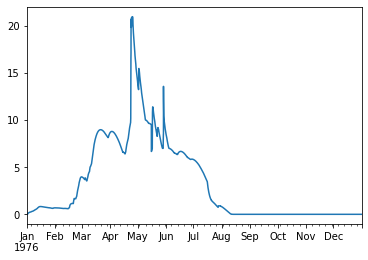

In [14]:
tsMaster['RO'].plot();

A number of Jupyter Lab extensions exist for plotting packages that will also allow the user to pan and zoom into the plot.
One example is the matplotlib library ipympl used by the jupyter-matplotlib interactive widget.

In [15]:
# For later use create this DataFrame containing the above statistics
dfStats = DataFrame()
dfStats['Master'] = tsMaster.RO.describe()  # Note alternate designation of RO w/o ['']

dfStats.Master

count   8784.00
mean       3.25
std        4.26
min        0.00
25%        0.00
50%        0.69
75%        6.56
max       20.97
Name: Master, dtype: float64

## There are multiple ways we can change parameters

Set path to the data for this example and show the data frin the HDF5 file

In [16]:
path = 'RCHRES/HYDR/PARAMETERS'
read_hdf(hdfname, path)

,VCONFG,AUX1FG,AUX2FG,AUX3FG,ODFVF1,ODFVF2,ODFVF3,...,STCOR,KS,DB50,NEXITS,LKFG,IREXIT,IRMINV
R001,0,1,1,1,-1,6,0,...,0.00,0.50,0.01,2,1,0,0.00
R002,0,1,1,1,4,0,0,...,0.00,0.50,0.01,1,0,0,0.00
R003,0,1,1,1,4,0,0,...,0.00,0.50,0.01,1,0,0,0.00
R004,0,1,1,1,4,0,0,...,0.00,0.50,0.01,1,0,0,0.00
R005,0,1,1,1,4,0,0,...,0.00,0.50,0.01,1,0,0,0.00


We modify the DB50 values for this example

###  Using fetch from HSP2tool

The fetch tool can update any existing element(s) in any HDF5 table, but it can not add or delete rows from the table. 

In [17]:
df, replace = fetchtable(hdfname, path, names=['DB50'])
df

,DB50
R001,0.01
R002,0.01
R003,0.01
R004,0.01
R005,0.01


In [18]:
# Replace the entire column with some entries modified
df['DB50'] = 0.01, 0.02, 0.03, 0.01, 0.01
df

,DB50
R001,0.01
R002,0.02
R003,0.03
R004,0.01
R005,0.01


Now call the *replace* function (returned from fetch) with the modified data.

In [19]:
replace(df)

read_hdf(hdfname, path)  # verify HDF5 file was changed

,VCONFG,AUX1FG,AUX2FG,AUX3FG,ODFVF1,ODFVF2,ODFVF3,...,STCOR,KS,DB50,NEXITS,LKFG,IREXIT,IRMINV
R001,0,1,1,1,-1,6,0,...,0.00,0.50,0.01,2,1,0,0.00
R002,0,1,1,1,4,0,0,...,0.00,0.50,0.02,1,0,0,0.00
R003,0,1,1,1,4,0,0,...,0.00,0.50,0.03,1,0,0,0.00
R004,0,1,1,1,4,0,0,...,0.00,0.50,0.01,1,0,0,0.00
R005,0,1,1,1,4,0,0,...,0.00,0.50,0.01,1,0,0,0.00


Restore test10.h5 to orginal value

In [20]:
!xcopy TutorialData  Data /q /c /y

4 File(s) copied


### Use Pandas to Read and Write

Pandas can replace any existing data, add new rows and columns - but has a learning curve.

In [21]:
df = read_hdf(hdfname, path)  # review the file before changes
df

,VCONFG,AUX1FG,AUX2FG,AUX3FG,ODFVF1,ODFVF2,ODFVF3,...,STCOR,KS,DB50,NEXITS,LKFG,IREXIT,IRMINV
R001,0,1,1,1,-1,6,0,...,0.00,0.50,0.01,2,1,0,0.00
R002,0,1,1,1,4,0,0,...,0.00,0.50,0.01,1,0,0,0.00
R003,0,1,1,1,4,0,0,...,0.00,0.50,0.01,1,0,0,0.00
R004,0,1,1,1,4,0,0,...,0.00,0.50,0.01,1,0,0,0.00
R005,0,1,1,1,4,0,0,...,0.00,0.50,0.01,1,0,0,0.00


Make some specific changes.

In [22]:
df.loc['R001', 'DB50'] = 1.0
df.loc['R003', 'DB50'] = 2.0
df.loc['R005', 'DB50'] = 3.0
df.loc['R001', 'DELTH'] = 100.0

Save the changes to the HDF5 file and verify it worked.

In [23]:
df.to_hdf(hdfname, path, data_columns=True, format='table' )

read_hdf(hdfname, path)   # verify HDF5 file was changed

,VCONFG,AUX1FG,AUX2FG,AUX3FG,ODFVF1,ODFVF2,ODFVF3,...,STCOR,KS,DB50,NEXITS,LKFG,IREXIT,IRMINV
R001,0,1,1,1,-1,6,0,...,0.00,0.50,1.00,2,1,0,0.00
R002,0,1,1,1,4,0,0,...,0.00,0.50,0.01,1,0,0,0.00
R003,0,1,1,1,4,0,0,...,0.00,0.50,2.00,1,0,0,0.00
R004,0,1,1,1,4,0,0,...,0.00,0.50,0.01,1,0,0,0.00
R005,0,1,1,1,4,0,0,...,0.00,0.50,3.00,1,0,0,0.00


Restore test10.h5 to orginal value

In [24]:
!xcopy TutorialData  Data /q /c /y

4 File(s) copied


### Use HSPTools readCSV tool

The *RCHRESexample.csv*  file can be viewed using any spreadsheet program or from Jupyter Lab.

The readCSV tool can read a CSV file which can be the entire table or a subset and update the HDF5 file table with any changes. It can not add rows or columns.

In [25]:
csvpath = 'DATA/RCHRESexample.csv'

Here are the contents to this CSV file for reference

In [26]:
with open(csvpath,'r') as file:
    csv = file.read()
csv

',DB50,DELTH\nR002,1,20\nR005,2,40\n'

Show the original file again

In [27]:
read_hdf(hdfname, path)

,VCONFG,AUX1FG,AUX2FG,AUX3FG,ODFVF1,ODFVF2,ODFVF3,...,STCOR,KS,DB50,NEXITS,LKFG,IREXIT,IRMINV
R001,0,1,1,1,-1,6,0,...,0.00,0.50,0.01,2,1,0,0.00
R002,0,1,1,1,4,0,0,...,0.00,0.50,0.01,1,0,0,0.00
R003,0,1,1,1,4,0,0,...,0.00,0.50,0.01,1,0,0,0.00
R004,0,1,1,1,4,0,0,...,0.00,0.50,0.01,1,0,0,0.00
R005,0,1,1,1,4,0,0,...,0.00,0.50,0.01,1,0,0,0.00


Now read the CSV file which in this case is only a subset with changes and update the HDF5 file directly.

In [28]:
readCSV(csvpath, hdfname, path)

read_hdf(hdfname, path)  # verify HDF5 file was changed

,VCONFG,AUX1FG,AUX2FG,AUX3FG,ODFVF1,ODFVF2,ODFVF3,...,STCOR,KS,DB50,NEXITS,LKFG,IREXIT,IRMINV
R001,0,1,1,1,-1,6,0,...,0.00,0.50,0.01,2,1,0,0.00
R002,0,1,1,1,4,0,0,...,0.00,0.50,1.00,1,0,0,0.00
R003,0,1,1,1,4,0,0,...,0.00,0.50,0.01,1,0,0,0.00
R004,0,1,1,1,4,0,0,...,0.00,0.50,0.01,1,0,0,0.00
R005,0,1,1,1,4,0,0,...,0.00,0.50,2.00,1,0,0,0.00


Restore test10.h5 to orginal value

In [29]:
!xcopy TutorialData  Data /q /c /y

4 File(s) copied


### Use Pandas and Qgrid Functionality to Update Parameters

This example is an FTable so you can see adding or deleting rows is easy with this tool.

**NOTE** Skip this section if you haven't installed QGRID. Some installation instruction hints are found below. See the Qgrid documentation for the latest installation instructions.

##### Some Qgrid hints

The project on GitHub [QGRID](https://github.com/quantopian/qgrid).
The pypi install is [QGRID](https://pypi.org/project/qgrid/)

To use with Jupyter Lab, the qgid version must be 1.3.1 or greater.

From anaconda prompt:
 + conda activate *yourenvironment*
 + pip install qgrid
 + jupyter labextension install qgrid2    
 
To work with your DataFrame *myDF*:

`qw = qgrid.QgridWidget(df=myDF, show_toolbar=True)`

To save the modified DataFrame:

`myDF = qw.get_changed_df()`

Tell qgrid to automatically render all DataFrames and Series as qgrids.

`qgrid.enable()`

Disable automatic display so we can display DataFrames in the normal way
`qgrid.disable()`
 

In [30]:
import qgrid
path = 'FTABLES/FT001'  # switching to a new example to consider adding/deleting rows or columns

After you run the cell below, double click on an item to edit it.  Try a few.  Add or delete a row.

In [31]:
df = read_hdf(hdfname, path)
qw = qgrid.QgridWidget(df=df, show_toolbar=True)
qw

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

When you have modified a few items, run the next cell

In [32]:
df = qw.get_changed_df()
df.to_hdf(hdfname, path, data_columns=True, format='table')

read_hdf(hdfname, path)  # verify HDF5 file was changed

,Depth,Area,Volume,Disch1,Disch2,Disch3
0,0.00,0.00,0.00,0.00,0.00,0.00
1,2.00,1.21,1.21,0.00,0.00,0.00
2,4.00,2.42,4.85,0.00,0.00,0.00
3,6.00,3.64,10.91,0.00,0.00,0.00
4,8.00,4.85,19.39,0.00,0.00,0.00
5,10.00,6.06,30.30,0.00,0.00,0.00
6,12.00,7.27,43.64,5.00,3.50,0.00
7,14.00,8.48,59.40,6.25,4.38,0.00
8,16.00,9.70,77.58,7.50,5.25,0.00
9,18.00,10.91,98.18,8.75,6.12,0.00


Restore test10.h5 to orginal value

In [33]:
!xcopy TutorialData  Data /q /c /y

4 File(s) copied


## Use HSPTools mainDoE (Design of Experiment) function

The Design of Experiment (DoE) function can automatically make many runs changing HSP2 parameters and flags and save all the results for analysis.  It is much faster to make many runs with this tool rather than to run HSP2 many times. Each run's results are saved to a different directory (folder, group) in the HDF5 file for later analysis.

Here is an example DoE to show some possibilities. Lines with the same run number are combined to allow multiple changes in the same run.

In [34]:
doe = [ 
 # run number, path to data, segment, data name, data value -- repeat
 [1, 'PERLND/PWATER/PARAMETERS', 'P001', 'FOREST', 0.02], 
 [1, 'PERLND/PWATER/PARAMETERS', 'P001', 'INFILT', 0.15], 
 [2, 'PERLND/PWATER/PARAMETERS', 'P001', 'FOREST', 0.01],
 [2, 'PERLND/PWATER/PARAMETERS', 'P001', 'INFILT', 0.20], 
 [3, 'PERLND/PWATER/PARAMETERS', 'P001', 'FOREST', 0.02], 
 [3, 'PERLND/PWATER/PARAMETERS', 'P001', 'INFILT', 0.15], 
 [4, 'PERLND/PWATER/PARAMETERS', 'P001', 'FOREST', 0.01],
 [4, 'PERLND/PWATER/PARAMETERS', 'P001', 'INFILT', 0.20],
    
 [5, 'PERLND/PWATER/PARAMETERS', 'P001', 'INFILT', 0.05], 
 [6, 'PERLND/PWATER/PARAMETERS', 'P001', 'INFILT', 0.10], 
 [7, 'PERLND/PWATER/PARAMETERS', 'P001', 'INFILT', 0.15], 
 [8, 'PERLND/PWATER/PARAMETERS', 'P001', 'INFILT', 0.20], 
 [9, 'PERLND/PWATER/PARAMETERS', 'P001', 'INFILT', 0.25],   
    
 [10, 'PERLND/SNOW/PARAMETERS', 'P001', 'MWATER', 0.09],
 [10, 'IMPLND/SNOW/PARAMETERS', 'I001', 'MWATER', 0.09],
    
 [11, 'PERLND/SNOW/PARAMETERS',   'P001', 'MWATER', 0.07],
 [11, 'PERLND/PWATER/PARAMETERS', 'P001', 'FOREST', 0.02],
    
 [12, 'PERLND/PWATER/MONTHLY/CEPSC', 'P001', 'MAR', 0.04],
 [13, 'PERLND/PWATER/MONTHLY/CEPSC', 'P001', 'MAY', 0.05],
    
 [14, 'PERLND/SNOW/PARAMETERS', 'P001', 'MWATER', 0.09],
 [14, 'IMPLND/SNOW/PARAMETERS', 'I001', 'MWATER', 0.09],    

 [14, 'PERLND/SNOW/FLAGS', 'P001', 'ICEFG', 0],
 [14, 'IMPLND/SNOW/FLAGS', 'I001', 'ICEFG', 0],
 [15, 'PERLND/SNOW/FLAGS', 'P001', 'ICEFG', 1],
 [15, 'IMPLND/SNOW/FLAGS', 'I001', 'ICEFG', 1]]    

### Example DoE run

Demonstrate with a simpler DoE

In [35]:
doe = [
 [1, 'PERLND/PWATER/PARAMETERS', 'P001', 'INFILT', 0.075],
 [1, 'PERLND/PWATER/PARAMETERS', 'P001', 'LZSN',       4],
 [2, 'PERLND/PWATER/PARAMETERS', 'P001', 'INFILT',  0.30],
 [2, 'PERLND/PWATER/PARAMETERS', 'P001', 'LZSN',    12.0]]

The third argument is the name of the top directory. Under this directory, each run is given a directory with name **runN** where N is the run number from the DoE table.

In [36]:
mainDoE(hdfname, doe, 'Sensitivity_LZSN_INFILT', saveall=True)

2020-06-13 14:57:20.62   Processing started for file Data/test10.h5; saveall=True
2020-06-13 14:57:23.41   Simulation Start: 1976-01-01 00:00:00, Stop: 1977-01-01 00:00:00
2020-06-13 14:57:23.41      Starting Run 1; saving as Sensitivity_LZSN_INFILT/RUN1
2020-06-13 14:57:23.42         PERLND P001 DELT(minutes): 60
2020-06-13 14:57:23.49            SNOW
2020-06-13 14:57:23.53            PWATER
2020-06-13 14:57:23.53               {'INFILT': 0.075, 'LZSN': 4.0}
2020-06-13 14:57:23.59         RCHRES R001 DELT(minutes): 60
2020-06-13 14:57:23.67            HYDR
2020-06-13 14:57:23.73         RCHRES R002 DELT(minutes): 60
2020-06-13 14:57:23.80            HYDR
2020-06-13 14:57:23.84         RCHRES R003 DELT(minutes): 60
2020-06-13 14:57:23.91            HYDR
2020-06-13 14:57:23.96         RCHRES R004 DELT(minutes): 60
2020-06-13 14:57:24.03            HYDR
2020-06-13 14:57:24.08         IMPLND I001 DELT(minutes): 60
2020-06-13 14:57:24.15            SNOW
2020-06-13 14:57:24.19            IW

### Examine the results of the DoE run

In [37]:
# Acquire and Calculate Stats on Run 1 & Run 2 and Compare to Master
tsRun_1 = read_hdf(hdfname, 'Sensitivity_LZSN_INFILT/RUN1/RCHRES_R001/HYDR')
tsRun_2 = read_hdf(hdfname, 'Sensitivity_LZSN_INFILT/RUN2/RCHRES_R001/HYDR')

dfStats['Run1'] = tsRun_1.RO.describe()
dfStats['Run2'] = tsRun_2.RO.describe()
dfStats

,Master,Run1,Run2
count,8784.00,8784.00,8784.00
mean,3.25,4.97,2.37
std,4.26,8.53,3.19
min,0.00,0.00,0.00
25%,0.00,0.00,0.00
50%,0.69,1.92,0.41
75%,6.56,7.06,4.27
max,20.97,304.14,13.73


#### Visualize the results

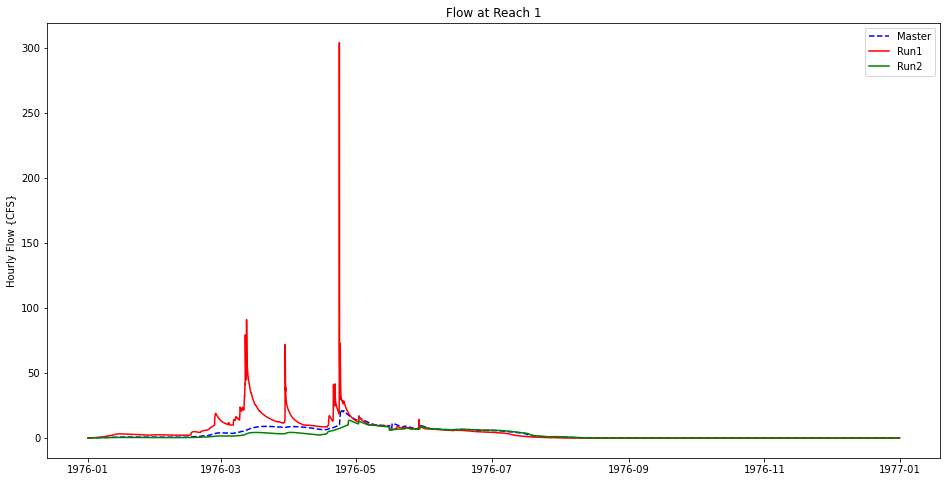

In [38]:
plt.figure(figsize=(16,8))
plt.plot('RO', 'b--', data=tsMaster, label='Master')
plt.plot('RO', 'r',   data=tsRun_1,  label='Run1')
plt.plot('RO', 'g-',  data=tsRun_2,  label='Run2')
plt.title('Flow at Reach 1')
plt.ylabel('Hourly Flow {CFS}')
plt.legend(loc='best') 

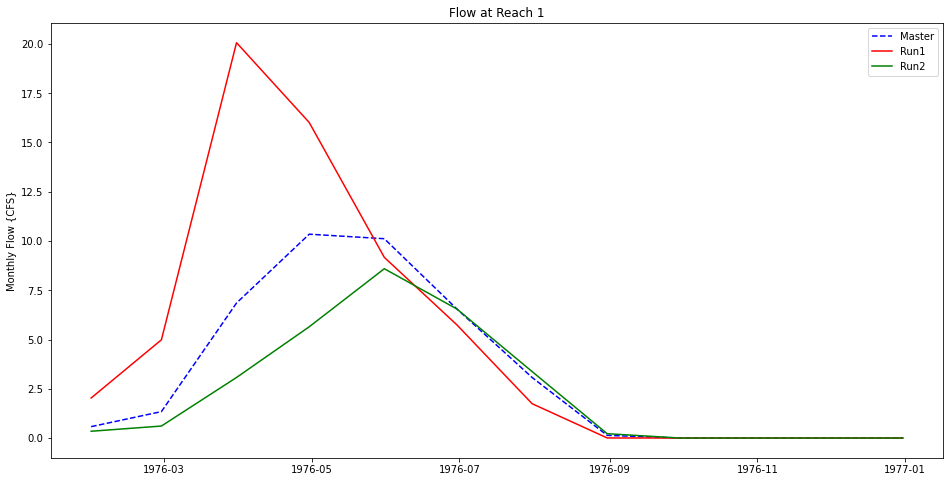

In [39]:
# Resample for Monthly Flow
plt.figure(figsize=(16,8))
plt.plot('RO', 'b--', data=tsMaster.resample('M').mean(),   label='Master')
plt.plot('RO', 'r',   data=tsRun_1.resample('M').mean(),    label='Run1')
plt.plot('RO', 'g-',   data=tsRun_2.resample('M').mean(),  label='Run2')
plt.title('Flow at Reach 1')
plt.ylabel('Monthly Flow {CFS}')
plt.legend(loc='best') 

### Example with random experiments

In [40]:
# Use DoE approach to do a quick sensitivity analysis of LZSN
N = 20   # number of runs - generally large such as 1000 or 10,000
path = 'PERLND/PWATER/PARAMETERS'
doe = []
for r in range (1,N+1):
    doe.append([r, path, 'P001', 'LZSN', 1.0 + 15.0 * float(rand(1))])
    
doe

[[1, 'PERLND/PWATER/PARAMETERS', 'P001', 'LZSN', 15.257969289213454],
 [2, 'PERLND/PWATER/PARAMETERS', 'P001', 'LZSN', 6.328599555765111],
 [3, 'PERLND/PWATER/PARAMETERS', 'P001', 'LZSN', 10.595125499657984],
 [4, 'PERLND/PWATER/PARAMETERS', 'P001', 'LZSN', 9.507579394749587],
 [5, 'PERLND/PWATER/PARAMETERS', 'P001', 'LZSN', 11.042000982931297],
 [6, 'PERLND/PWATER/PARAMETERS', 'P001', 'LZSN', 11.413373127377923],
 [7, 'PERLND/PWATER/PARAMETERS', 'P001', 'LZSN', 9.487044859220347],
 [8, 'PERLND/PWATER/PARAMETERS', 'P001', 'LZSN', 10.57496179422083],
 [9, 'PERLND/PWATER/PARAMETERS', 'P001', 'LZSN', 8.703301079101049],
 [10, 'PERLND/PWATER/PARAMETERS', 'P001', 'LZSN', 12.057401563379337],
 [11, 'PERLND/PWATER/PARAMETERS', 'P001', 'LZSN', 6.735072474922411],
 [12, 'PERLND/PWATER/PARAMETERS', 'P001', 'LZSN', 11.599431435768015],
 [13, 'PERLND/PWATER/PARAMETERS', 'P001', 'LZSN', 7.942937737417215],
 [14, 'PERLND/PWATER/PARAMETERS', 'P001', 'LZSN', 12.993393441916954],
 [15, 'PERLND/PWATER/P

For later, save the LZSN values created for each run

In [41]:
lzsn = [lst[-1] for lst in doe]
lzsn

[15.257969289213454,
 6.328599555765111,
 10.595125499657984,
 9.507579394749587,
 11.042000982931297,
 11.413373127377923,
 9.487044859220347,
 10.57496179422083,
 8.703301079101049,
 12.057401563379337,
 6.735072474922411,
 11.599431435768015,
 7.942937737417215,
 12.993393441916954,
 13.755347376964778,
 6.570354827822293,
 3.422591071165432,
 5.278332093695426,
 1.254996374532409,
 6.243708799525908]

In [42]:
mainDoE(hdfname, doe, 'P001_LZSN')

2020-06-13 14:57:25.76   Processing started for file Data/test10.h5; saveall=False
2020-06-13 14:57:28.65   Simulation Start: 1976-01-01 00:00:00, Stop: 1977-01-01 00:00:00
2020-06-13 14:57:28.65      Starting Run 1; saving as P001_LZSN/RUN1
2020-06-13 14:57:28.65         PERLND P001 DELT(minutes): 60
2020-06-13 14:57:28.73            SNOW
2020-06-13 14:57:28.77            PWATER
2020-06-13 14:57:28.77               {'LZSN': 15.257969289213454}
2020-06-13 14:57:28.79               Error count 1: PWATER: GWVS < -0.02, set to zero
2020-06-13 14:57:28.81         RCHRES R001 DELT(minutes): 60
2020-06-13 14:57:28.89            HYDR
2020-06-13 14:57:28.95         RCHRES R002 DELT(minutes): 60
2020-06-13 14:57:29.01            HYDR
2020-06-13 14:57:29.06         RCHRES R003 DELT(minutes): 60
2020-06-13 14:57:29.13            HYDR
2020-06-13 14:57:29.17         RCHRES R004 DELT(minutes): 60
2020-06-13 14:57:29.24            HYDR
2020-06-13 14:57:29.28         IMPLND I001 DELT(minutes): 60
2020

Compare your run time for 20 times the result for a single run time at the start of this Notebook to using the DoE to run the 20 runs internally. You will find a significant improvement.

In [43]:
# Get paths to all the results for RCHRES
keys = [f'P001_LZSN/RUN{k}/RCHRES_R001/HYDR' for k in range(1,N+1)]
keys

['P001_LZSN/RUN1/RCHRES_R001/HYDR',
 'P001_LZSN/RUN2/RCHRES_R001/HYDR',
 'P001_LZSN/RUN3/RCHRES_R001/HYDR',
 'P001_LZSN/RUN4/RCHRES_R001/HYDR',
 'P001_LZSN/RUN5/RCHRES_R001/HYDR',
 'P001_LZSN/RUN6/RCHRES_R001/HYDR',
 'P001_LZSN/RUN7/RCHRES_R001/HYDR',
 'P001_LZSN/RUN8/RCHRES_R001/HYDR',
 'P001_LZSN/RUN9/RCHRES_R001/HYDR',
 'P001_LZSN/RUN10/RCHRES_R001/HYDR',
 'P001_LZSN/RUN11/RCHRES_R001/HYDR',
 'P001_LZSN/RUN12/RCHRES_R001/HYDR',
 'P001_LZSN/RUN13/RCHRES_R001/HYDR',
 'P001_LZSN/RUN14/RCHRES_R001/HYDR',
 'P001_LZSN/RUN15/RCHRES_R001/HYDR',
 'P001_LZSN/RUN16/RCHRES_R001/HYDR',
 'P001_LZSN/RUN17/RCHRES_R001/HYDR',
 'P001_LZSN/RUN18/RCHRES_R001/HYDR',
 'P001_LZSN/RUN19/RCHRES_R001/HYDR',
 'P001_LZSN/RUN20/RCHRES_R001/HYDR']

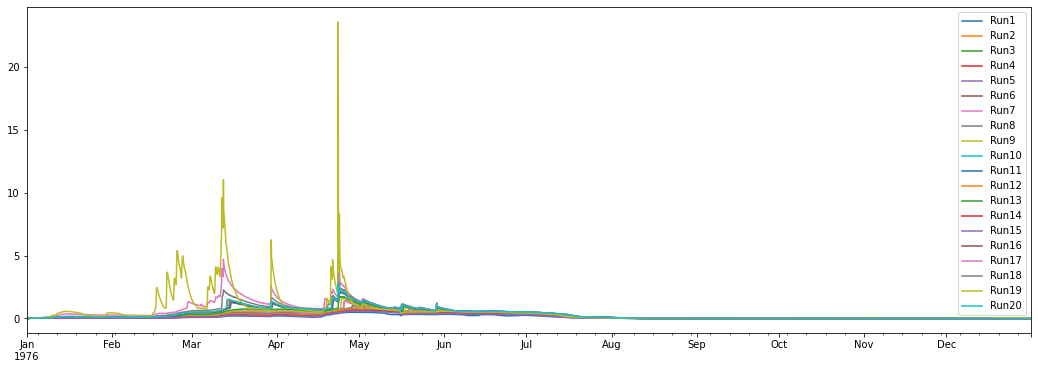

In [44]:
ts = DataFrame()
for r,key in enumerate(keys):
    df = read_hdf(hdfname, key)
    ts[f'Run{r+1}'] = df.ROVOL
    
ts.plot(label = 'simulated volume (ac-ft)',figsize = (18,6))

In [45]:
df = ts.describe().T
df['LZSN'] = lzsn   # previously saved above
df

,count,mean,std,min,25%,50%,75%,max,LZSN
Run1,8784.00,0.10,0.13,0.00,0.00,0.02,0.18,0.49,15.26
Run2,8784.00,0.33,0.44,0.00,0.00,0.09,0.57,2.72,6.33
Run3,8784.00,0.19,0.25,0.00,0.00,0.04,0.41,0.99,10.60
Run4,8784.00,0.22,0.29,0.00,0.00,0.04,0.47,1.41,9.51
Run5,8784.00,0.18,0.24,0.00,0.00,0.03,0.38,0.82,11.04
Run6,8784.00,0.17,0.22,0.00,0.00,0.03,0.35,0.79,11.41
Run7,8784.00,0.22,0.29,0.00,0.00,0.04,0.48,1.41,9.49
Run8,8784.00,0.19,0.25,0.00,0.00,0.04,0.42,1.00,10.57
Run9,8784.00,0.25,0.32,0.00,0.00,0.05,0.52,1.61,8.70
Run10,8784.00,0.15,0.21,0.00,0.00,0.03,0.31,0.72,12.06


Sorting may help find LZSN nearest to desired mean or to find a pattern.

In [46]:
df.sort_values(by=['mean'])

,count,mean,std,min,25%,50%,75%,max,LZSN
Run1,8784.00,0.10,0.13,0.00,0.00,0.02,0.18,0.49,15.26
Run15,8784.00,0.12,0.16,0.00,0.00,0.03,0.23,0.58,13.76
Run14,8784.00,0.13,0.18,0.00,0.00,0.03,0.26,0.64,12.99
Run10,8784.00,0.15,0.21,0.00,0.00,0.03,0.31,0.72,12.06
Run12,8784.00,0.17,0.22,0.00,0.00,0.03,0.34,0.77,11.60
Run6,8784.00,0.17,0.22,0.00,0.00,0.03,0.35,0.79,11.41
Run5,8784.00,0.18,0.24,0.00,0.00,0.03,0.38,0.82,11.04
Run3,8784.00,0.19,0.25,0.00,0.00,0.04,0.41,0.99,10.60
Run8,8784.00,0.19,0.25,0.00,0.00,0.04,0.42,1.00,10.57
Run4,8784.00,0.22,0.29,0.00,0.00,0.04,0.47,1.41,9.51


## Use a time series for the INFILT parameter

First, create a time series for INFILT and save it in the HDF5 file's /Timeseries directory.

###  Constant parameters in HSPF can be replaced by time series in $\textbf{HSP}^\textbf{2}$ 

Some HSPF parameters were optionally allow to vary in time using FLAG and MONTHLY tables. The other HSPF parameters were constants.
HSPF used the following algorithm to determine the parameter's value at any time in the simulation when it was allowed to vary:
+ First interpolate monthly table values to get daily values. 
+ The values at timesteps within each day are set to the day's daily value.

However, the HSPF Special Functions capability could be used to allow any HSPF parameter to vary over time.

This capability to vary any parameter over time is made more integral to $\textbf{HSP}^\textbf{2}$.

### IMPLIMENTATION in $\textbf{HSP}^\textbf{2}$ 

Internally, $\textbf{HSP}^\textbf{2}$, creates a time series for each parameter over the entire simulation interval at the start of each activity's code. 

The rules for creating a time series are simple:
+ Whenever the EXT_SOURCES table directs a time series with the name of an HSPF parameter (in TMEMN) to the current OPSEQ operation and segment (TVOL and TVOLNO), then this time series will be used in place of the parameter. (Because this is different bahavior than HSP2, a logged message
alerts the user whenever this is done.)
+ Otherwise, if the flag and monthly table information used by HSPF to allow a parameter to vary over time is found in the $\textbf{HSP}^\textbf{2}$ tables, then the HSPF algorithm is used to create a time series over the entire simulation interval.
+ Otherwise, this was is constant parameter in HSPF. The constant value found in for the parameter from PARAMETERS table will be used to fill the array.

There is no additional performance hit to specify a time series for a parameter since all parameters are already treated as time series internally anyway.

#### Prepare the INFILT time series

Get the simulation's GLOBAL data to create a time index for this simulation. The new series must at least contain the simulations start, stop boundaries.

In [47]:
gdata = read_hdf(hdfname, '/CONTROL/GLOBAL')['Info']
gdata

Comment    Version 11 test run: PERLND and IMPLND w/ RCHR...
Start                                       1976-01-01 00:00
Stop                                        1977-01-01 00:00
Name: Info, dtype: object

The frequency does not need to be at any fixed value - HSP2 will resample (up or down) to make it correct.

In [48]:
start = gdata['Start']
stop  = gdata['Stop']

tindex = date_range(start, stop, freq='h')
tindex

DatetimeIndex(['1976-01-01 00:00:00', '1976-01-01 01:00:00',
               '1976-01-01 02:00:00', '1976-01-01 03:00:00',
               '1976-01-01 04:00:00', '1976-01-01 05:00:00',
               '1976-01-01 06:00:00', '1976-01-01 07:00:00',
               '1976-01-01 08:00:00', '1976-01-01 09:00:00',
               ...
               '1976-12-31 15:00:00', '1976-12-31 16:00:00',
               '1976-12-31 17:00:00', '1976-12-31 18:00:00',
               '1976-12-31 19:00:00', '1976-12-31 20:00:00',
               '1976-12-31 21:00:00', '1976-12-31 22:00:00',
               '1976-12-31 23:00:00', '1977-01-01 00:00:00'],
              dtype='datetime64[ns]', length=8785, freq='H')

Just set some values.

In [49]:
infilt = Series(0.10, index=tindex)                 # set the value of 0.10 at each timestep
infilt['1976-03-01 01:00':'1976-11-01 05:00'] = 0.20   # overwrite for all datetimes in this interval (end points included)

infilt

1976-01-01 00:00:00   0.10
1976-01-01 01:00:00   0.10
1976-01-01 02:00:00   0.10
1976-01-01 03:00:00   0.10
1976-01-01 04:00:00   0.10
                      ... 
1976-12-31 20:00:00   0.10
1976-12-31 21:00:00   0.10
1976-12-31 22:00:00   0.10
1976-12-31 23:00:00   0.10
1977-01-01 00:00:00   0.10
Freq: H, Length: 8785, dtype: float64

Save to the HDF5 file

In [50]:
infilt.to_hdf(hdfname, 'TIMESERIES/infilt')

####  Add the timeseries to the EXT_SOURCES table

In [51]:
ext = read_hdf(hdfname, '/CONTROL/EXT_SOURCES')
nrows, ncols = ext.shape

nrows, ncols

(50, 14)

In [52]:
ext.loc[nrows] = ['*', 'infilt', 'infilt', '', '', '', 1.0, 'SAME', 'PERLND', '', 'INFILT', '', 'P001',  'Adding New series to control infilt']
ext.tail()

,SVOL,SVOLNO,SMEMN,SMEMSB,SSYST,SGAPST,MFACTOR,TRAN,TVOL,TGRPN,TMEMN,TMEMSB,TVOLNO,COMMENT
20,*,TS041,EVAP,31,ENGL,,0.70,DIV,RCHRES,,POTEV,,R005,
27,*,TS042,WIND,31,ENGL,,1.00,DIV,RCHRES,,WIND,,R005,
13,*,TS122,ATMP,31,ENGL,,1.00,SAME,RCHRES,,GATMP,,R005,
49,*,TS135,CLDC,31,ENGL,,1.00,SAME,RCHRES,,CLOUD,,R005,
50,*,infilt,infilt,,,,1.00,SAME,PERLND,,INFILT,,P001,Adding New series to control infilt


In [53]:
ext.to_hdf(hdfname, '/CONTROL/EXT_SOURCES',  data_columns=True, format='table')

#### Now run the simulation

In [54]:
main(hdfname, saveall=True)

2020-06-13 14:57:48.28   Processing started for file Data/test10.h5; saveall=True
2020-06-13 14:57:51.28   Simulation Start: 1976-01-01 00:00:00, Stop: 1977-01-01 00:00:00
2020-06-13 14:57:51.28      PERLND P001 DELT(minutes): 60
2020-06-13 14:57:51.35         SNOW
2020-06-13 14:57:51.40         PWATER
2020-06-13 14:57:51.46      RCHRES R001 DELT(minutes): 60
2020-06-13 14:57:51.55         HYDR
2020-06-13 14:57:51.61      RCHRES R002 DELT(minutes): 60
2020-06-13 14:57:51.68         HYDR
2020-06-13 14:57:51.73      RCHRES R003 DELT(minutes): 60
2020-06-13 14:57:51.80         HYDR
2020-06-13 14:57:51.85      RCHRES R004 DELT(minutes): 60
2020-06-13 14:57:51.91         HYDR
2020-06-13 14:57:51.98      IMPLND I001 DELT(minutes): 60
2020-06-13 14:57:52.04         SNOW
2020-06-13 14:57:52.09         IWATER
2020-06-13 14:57:52.11      RCHRES R005 DELT(minutes): 60
2020-06-13 14:57:52.18         HYDR
2020-06-13 14:57:52.24   Done; Run time is about 00:03.9 (mm:ss)


                           

In [55]:
# Acquire and Calculate Stats on Run 3 and Compare to Other Runs
tsRun_3 = read_hdf(hdfname, '/RESULTS/RCHRES_R001/HYDR')

dfStats['Run3'] = tsRun_3.RO.describe()
dfStats

,Master,Run1,Run2,Run3
count,8784.00,8784.00,8784.00,8784.00
mean,3.25,4.97,2.37,3.48
std,4.26,8.53,3.19,4.59
min,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00
50%,0.69,1.92,0.41,0.68
75%,6.56,7.06,4.27,6.83
max,20.97,304.14,13.73,22.12


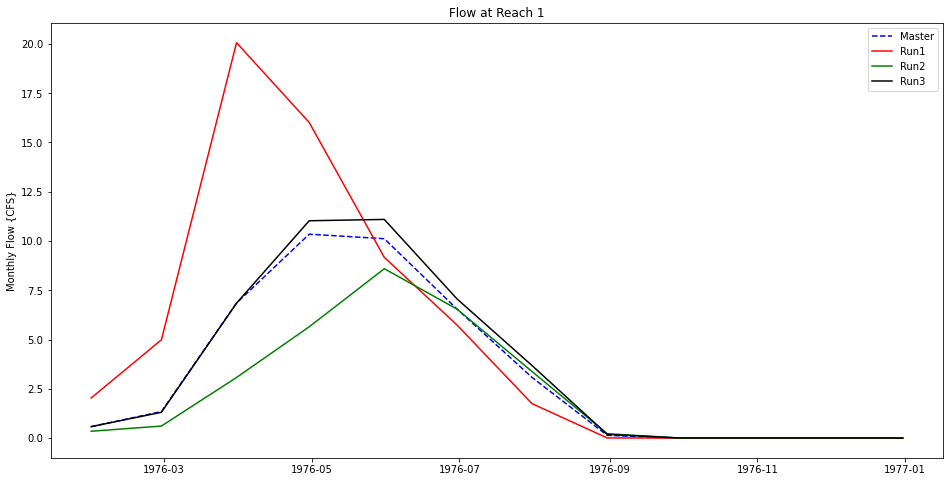

In [56]:
# Resample for Monthly Flow
plt.figure(figsize=(16,8))
plt.plot('RO', 'b--', data=tsMaster.resample('M').mean(),   label='Master')
plt.plot('RO', 'r',   data=tsRun_1.resample('M').mean(),    label='Run1')
plt.plot('RO', 'g',   data=tsRun_2.resample('M').mean(),    label='Run2')
plt.plot('RO', 'k',   data=tsRun_3.resample('M').mean(),    label='Run3')

plt.title('Flow at Reach 1')
plt.ylabel('Monthly Flow {CFS}')
plt.legend(loc='best') 

### MFACTOR and AFACTR may be replaced by a time series

The MFACTOR and AFACTR values may be optionally mutiplied pointwise by a time series. If the AFACTR is adjusted this way, it could simulate the growth or contraction of a PERLND or IMPLND segment over time. 

This is done registering a time series in the EXT_SOURCES table with a TMEMN value following a naming convention:
 + SVOL, SVOLNO, underscore, MFACTOR  (for example  PERLNDP001_MFACTOR for the source PERLND segment P001)
 + SVOL, SVOLNO, underscore, AFACTR   (for example  IMPLNDI001_AFACTR  for the source IMPLND segment I001)
 
The flow into a RCHRES segment is determined by looking at the LINKS table (a combined NETWORK and SCHEMATIC table) and the MASS_LINKS table if a MASS_LINK is specified.
HSP2 finds the normal MFACTOR and AFACTOR at the code where flows are determined, the code then looks in the timeseries directory assigned by the EXT_SOURCES table for that segment and checks to see if timeseries with the appropriate naming convention exists.  If found, the the time series requested by the LINKS table is pointwise multiplied by the MFACTOR or AFACTR timeseries before be handed to the RCHRES activities.

The naming convention is essential to match the timeseries with the SVOL and SVOLNO in the LINKS/MASS_LINKS tables.

Although not required, the timeseries name is suggested to also be the TMEMN.

#### Example: Simulate a town growing and replacing  farm land during a simulation.

This scenario is a town (IMPLND segment I001) growing over time replacing farm land (PERLND segment P001). The total area of the two segments must remain constant. This example uses the HSPF test10 HDF5, tutorial.h5.

The total area of the two segments P001 and I001 is 9000 acres. 

The IMPLND area will increase linearly by 20% over the simulation period. That is the IMPLD segment will grow from 3000 to 3600 acres.
This requires the PERLND segment to shrink from 6000 to 5400 acres.

First, create a timeseries for IMPLND. Name it *implnd* and save in the HDF5 file.

This process uses the tindex computed in the last example.

In [57]:
implnd = Series(index=tindex, dtype=float)
implnd[tindex[0]] = 3000.
implnd[tindex[-1]] = 1.2 * 3000.
implnd = implnd.interpolate(how='time')

implnd.to_hdf(hdfname, 'TIMESERIES/IMPLND_AFACTR')

Create a timeseries for PERLND

Start with the original PERLND area and pointwise (in time) subtract the increase in the IMPLND segment.

In [58]:
perlnd = 6000. - (implnd-3000.)         # Note: this is a full vector calculation

perlnd.to_hdf(hdfname, 'TIMESERIES/PERLND_AFACTR')

Add these two timeseries to the  EXT_SOURCES table

Note: Both the name of the timeseries and the TMEMN name must be match the name convention.

In [59]:
df = read_hdf(hdfname, 'CONTROL/EXT_SOURCES')
df

,SVOL,SVOLNO,SMEMN,SMEMSB,SSYST,SGAPST,MFACTOR,TRAN,TVOL,TGRPN,TMEMN,TMEMSB,TVOLNO,COMMENT
1,*,TS131,PREC,31,ENGL,ZERO,1.00,SAME,IMPLND,,PREC,,I001,
22,*,TS042,WIND,31,ENGL,,1.00,DIV,IMPLND,,WINMOV,,I001,
29,*,TS046,SOLR,31,ENGL,,1.00,DIV,IMPLND,,SOLRAD,,I001,
44,*,TS135,CLDC,31,ENGL,,1.00,SAME,IMPLND,,CLOUD,,I001,
15,*,TS041,EVAP,31,ENGL,,0.70,DIV,IMPLND,,PETINP,,I001,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,*,TS041,EVAP,31,ENGL,,0.70,DIV,RCHRES,,POTEV,,R005,
27,*,TS042,WIND,31,ENGL,,1.00,DIV,RCHRES,,WIND,,R005,
13,*,TS122,ATMP,31,ENGL,,1.00,SAME,RCHRES,,GATMP,,R005,
49,*,TS135,CLDC,31,ENGL,,1.00,SAME,RCHRES,,CLOUD,,R005,


Could use QGRID, but we will do this in Pandas.

Find the next unused index

In [60]:
nrows, ncols = df.shape

nrows, ncols

(51, 14)

In [61]:
df.loc[nrows, :]   = ['*', 'PERLND_AFACTR', '', '', 'ENGL', '', 1.0, 'SAME','RCHRES','','PERLNDP001_AFACTR','', 'R001', '']
df.loc[nrows+1, :] = ['*', 'IMPLND_AFACTR', '', '', 'ENGL', '', 1.0, 'SAME','RCHRES','','IMPLNDI001_AFACTR','', 'R005', '']
df

,SVOL,SVOLNO,SMEMN,SMEMSB,SSYST,SGAPST,MFACTOR,TRAN,TVOL,TGRPN,TMEMN,TMEMSB,TVOLNO,COMMENT
1,*,TS131,PREC,31,ENGL,ZERO,1.00,SAME,IMPLND,,PREC,,I001,
22,*,TS042,WIND,31,ENGL,,1.00,DIV,IMPLND,,WINMOV,,I001,
29,*,TS046,SOLR,31,ENGL,,1.00,DIV,IMPLND,,SOLRAD,,I001,
44,*,TS135,CLDC,31,ENGL,,1.00,SAME,IMPLND,,CLOUD,,I001,
15,*,TS041,EVAP,31,ENGL,,0.70,DIV,IMPLND,,PETINP,,I001,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13,*,TS122,ATMP,31,ENGL,,1.00,SAME,RCHRES,,GATMP,,R005,
49,*,TS135,CLDC,31,ENGL,,1.00,SAME,RCHRES,,CLOUD,,R005,
50,*,infilt,infilt,,,,1.00,SAME,PERLND,,INFILT,,P001,Adding New series to control infilt
51,*,PERLND_AFACTR,,,ENGL,,1.00,SAME,RCHRES,,PERLNDP001_AFACTR,,R001,


In [62]:
df.to_hdf(hdfname, 'CONTROL/EXT_SOURCES', format='table', data_columns=True)

Now run the simulation and look for the message displayed whenever AFACTR is replaced by a time series.

In [63]:
main(hdfname, saveall = 'True')

2020-06-13 14:57:52.82   Processing started for file Data/test10.h5; saveall=True
2020-06-13 14:57:55.86   Simulation Start: 1976-01-01 00:00:00, Stop: 1977-01-01 00:00:00
2020-06-13 14:57:55.86      PERLND P001 DELT(minutes): 60
2020-06-13 14:57:55.94         SNOW
2020-06-13 14:57:55.99         PWATER
2020-06-13 14:57:56.05      RCHRES R001 DELT(minutes): 60
2020-06-13 14:57:56.14         HYDR
2020-06-13 14:57:56.15            AFACTR modified by timeseries PERLNDP001_AFACTR
2020-06-13 14:57:56.21      RCHRES R002 DELT(minutes): 60
2020-06-13 14:57:56.27         HYDR
2020-06-13 14:57:56.32      RCHRES R003 DELT(minutes): 60
2020-06-13 14:57:56.39         HYDR
2020-06-13 14:57:56.44      RCHRES R004 DELT(minutes): 60
2020-06-13 14:57:56.50         HYDR
2020-06-13 14:57:56.56      IMPLND I001 DELT(minutes): 60
2020-06-13 14:57:56.63         SNOW
2020-06-13 14:57:56.67         IWATER
2020-06-13 14:57:56.70      RCHRES R005 DELT(minutes): 60
2020-06-13 14:57:56.76         HYDR
2020-06-13 1

In [64]:
# Acquire and Calculate Stats on Run 4 and Compare to Other Runs
tsRun_4  = read_hdf(hdfname, '/RESULTS/RCHRES_R001/HYDR')

dfStats['Run4'] = tsRun_4.RO.describe()
dfStats

,Master,Run1,Run2,Run3,Run4
count,8784.00,8784.00,8784.00,8784.00,8784.00
mean,3.25,4.97,2.37,3.48,3.37
std,4.26,8.53,3.19,4.59,4.43
min,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00
50%,0.69,1.92,0.41,0.68,0.68
75%,6.56,7.06,4.27,6.83,6.71
max,20.97,304.14,13.73,22.12,21.43


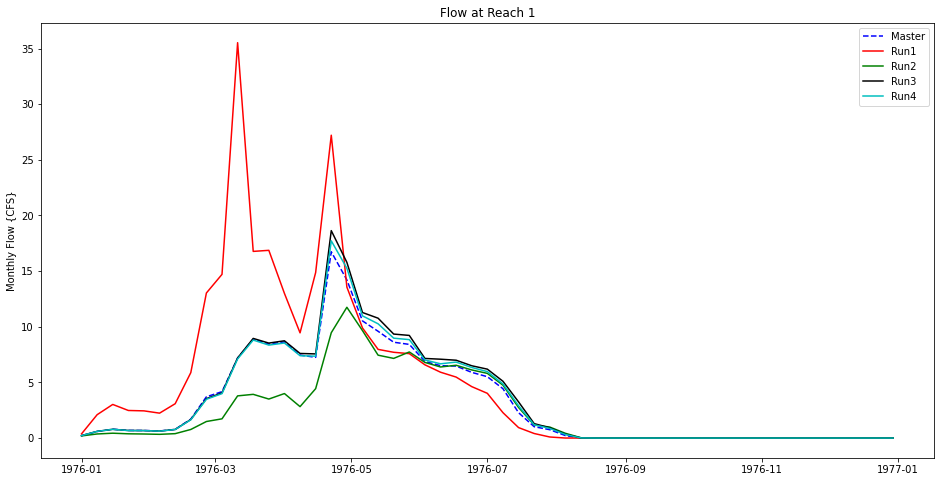

In [65]:
# Resample for Weekly Flow
plt.figure(figsize=(16,8))
plt.plot('RO', 'b--', data=tsMaster.resample('7D').mean(),   label='Master')
plt.plot('RO', 'r',   data=tsRun_1.resample('7D').mean(),    label='Run1')
plt.plot('RO', 'g',   data=tsRun_2.resample('7D').mean(),    label='Run2')
plt.plot('RO', 'k',   data=tsRun_3.resample('7D').mean(),    label='Run3')
plt.plot('RO', 'c',   data=tsRun_4.resample('7D').mean(),    label='Run4')

plt.title('Flow at Reach 1')
plt.ylabel('Monthly Flow {CFS}')
plt.legend(loc='best') 